In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

import pprint
pp = pprint.PrettyPrinter(width=41, compact=True)

from tqdm import tqdm_notebook as tqdm

import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', df.shape[0]+1)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.model_selection import GridSearchCV

In [93]:
df = pd.read_csv('ready_to_model_just_one')

# -----------------------------------------------------------------------------------------

# classifying genre

### logistic regression

In [ ]:
without_small_classes = ['rock', 'pop', 'country', 'soul', 'rap', 'hip hop', 'disco', 'metal', 'jazz']
main_genres = df[df['genre'].isin(without_small_classes)]
main_genres['genre'] = main_genres['genre'].replace(['rap', 'hip hop'], 'rap/hiphop')
main_genres['genre'] = main_genres['genre'].replace(['soul'], 'disco')

In [253]:
main_genres.genre.value_counts(normalize=True).max()

0.34860372340425533

In [57]:
check.genre.value_counts()

rock               5243
pop                4697
country            1684
soul               1301
rap                1124
hip hop             352
disco               259
metal               197
jazz                183
adult standards     180
house               169
blues               161
folk                114
funk                 99
freestyle            80
reggae               61
punk                 42
trap                 39
dance                23
electronic            7
dancehall             4
grunge                4
trance                4
indie                 3
Name: genre, dtype: int64

In [269]:
X_genre = main_genres[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
                    'speechiness', 'tempo', 'valence', 'duration', 'key', 'mode', 'time_signature',
         
          'spot_followers', 'peak_rank', 
       
          'artist_familiarity', 'track_longevity', 'time']]       # not artist/track/genre/spot_artist_pop

y_genre = main_genres['genre']

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X_genre, y_genre, stratify=y_genre, test_size=0.3, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Mean cross validated training scores:')
print(np.mean(cross_val_score(logreg, X_train, y_train, cv=5)))
print('Training score:')
print(logreg.score(X_train, y_train))
print('Test score:')
print(logreg.score(X_test, y_test))

Mean cross validated training scores:
0.41564331726292325
Training score:
0.4194528875379939
Test score:
0.41245567375886527


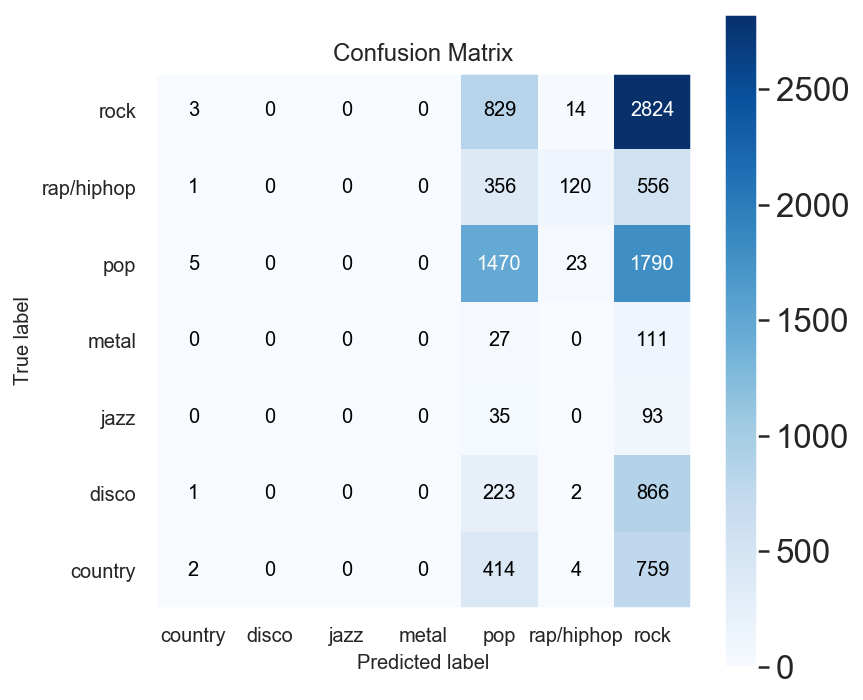

In [271]:
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", len(logreg.classes_)))
from sklearn.metrics import classification_report, confusion_matrix

predictions_train = logreg.predict(X_train)
predictions_test = logreg.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_train, predictions_train, figsize=(6,6))
plt.ylim([-0.5, len(y_train.unique())-0.5])
plt.show()

#### gridsearch

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [164]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
model = LogisticRegressionCV(solver='liblinear', multi_class='ovr', cv=5, max_iter=1000)

In [ ]:
%%notify

# setup the grid search
params = {'penalty': ['l1', 'l2'],
          'Cs': [np.logspace(-1, 1, 10)],
          'fit_intercept': [True, False],
          'solver': ['liblinear']}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train, y_train)

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C_)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))

### random forest classifier for main_genres

### less genres

In [ ]:
genre_list = ['hip hop','country','jazz']
#['rock','country','soul','hip hop','dance','rap','jazz','folk','disco','funk',
#'reggae','latin','house','electronic','blues','metal']

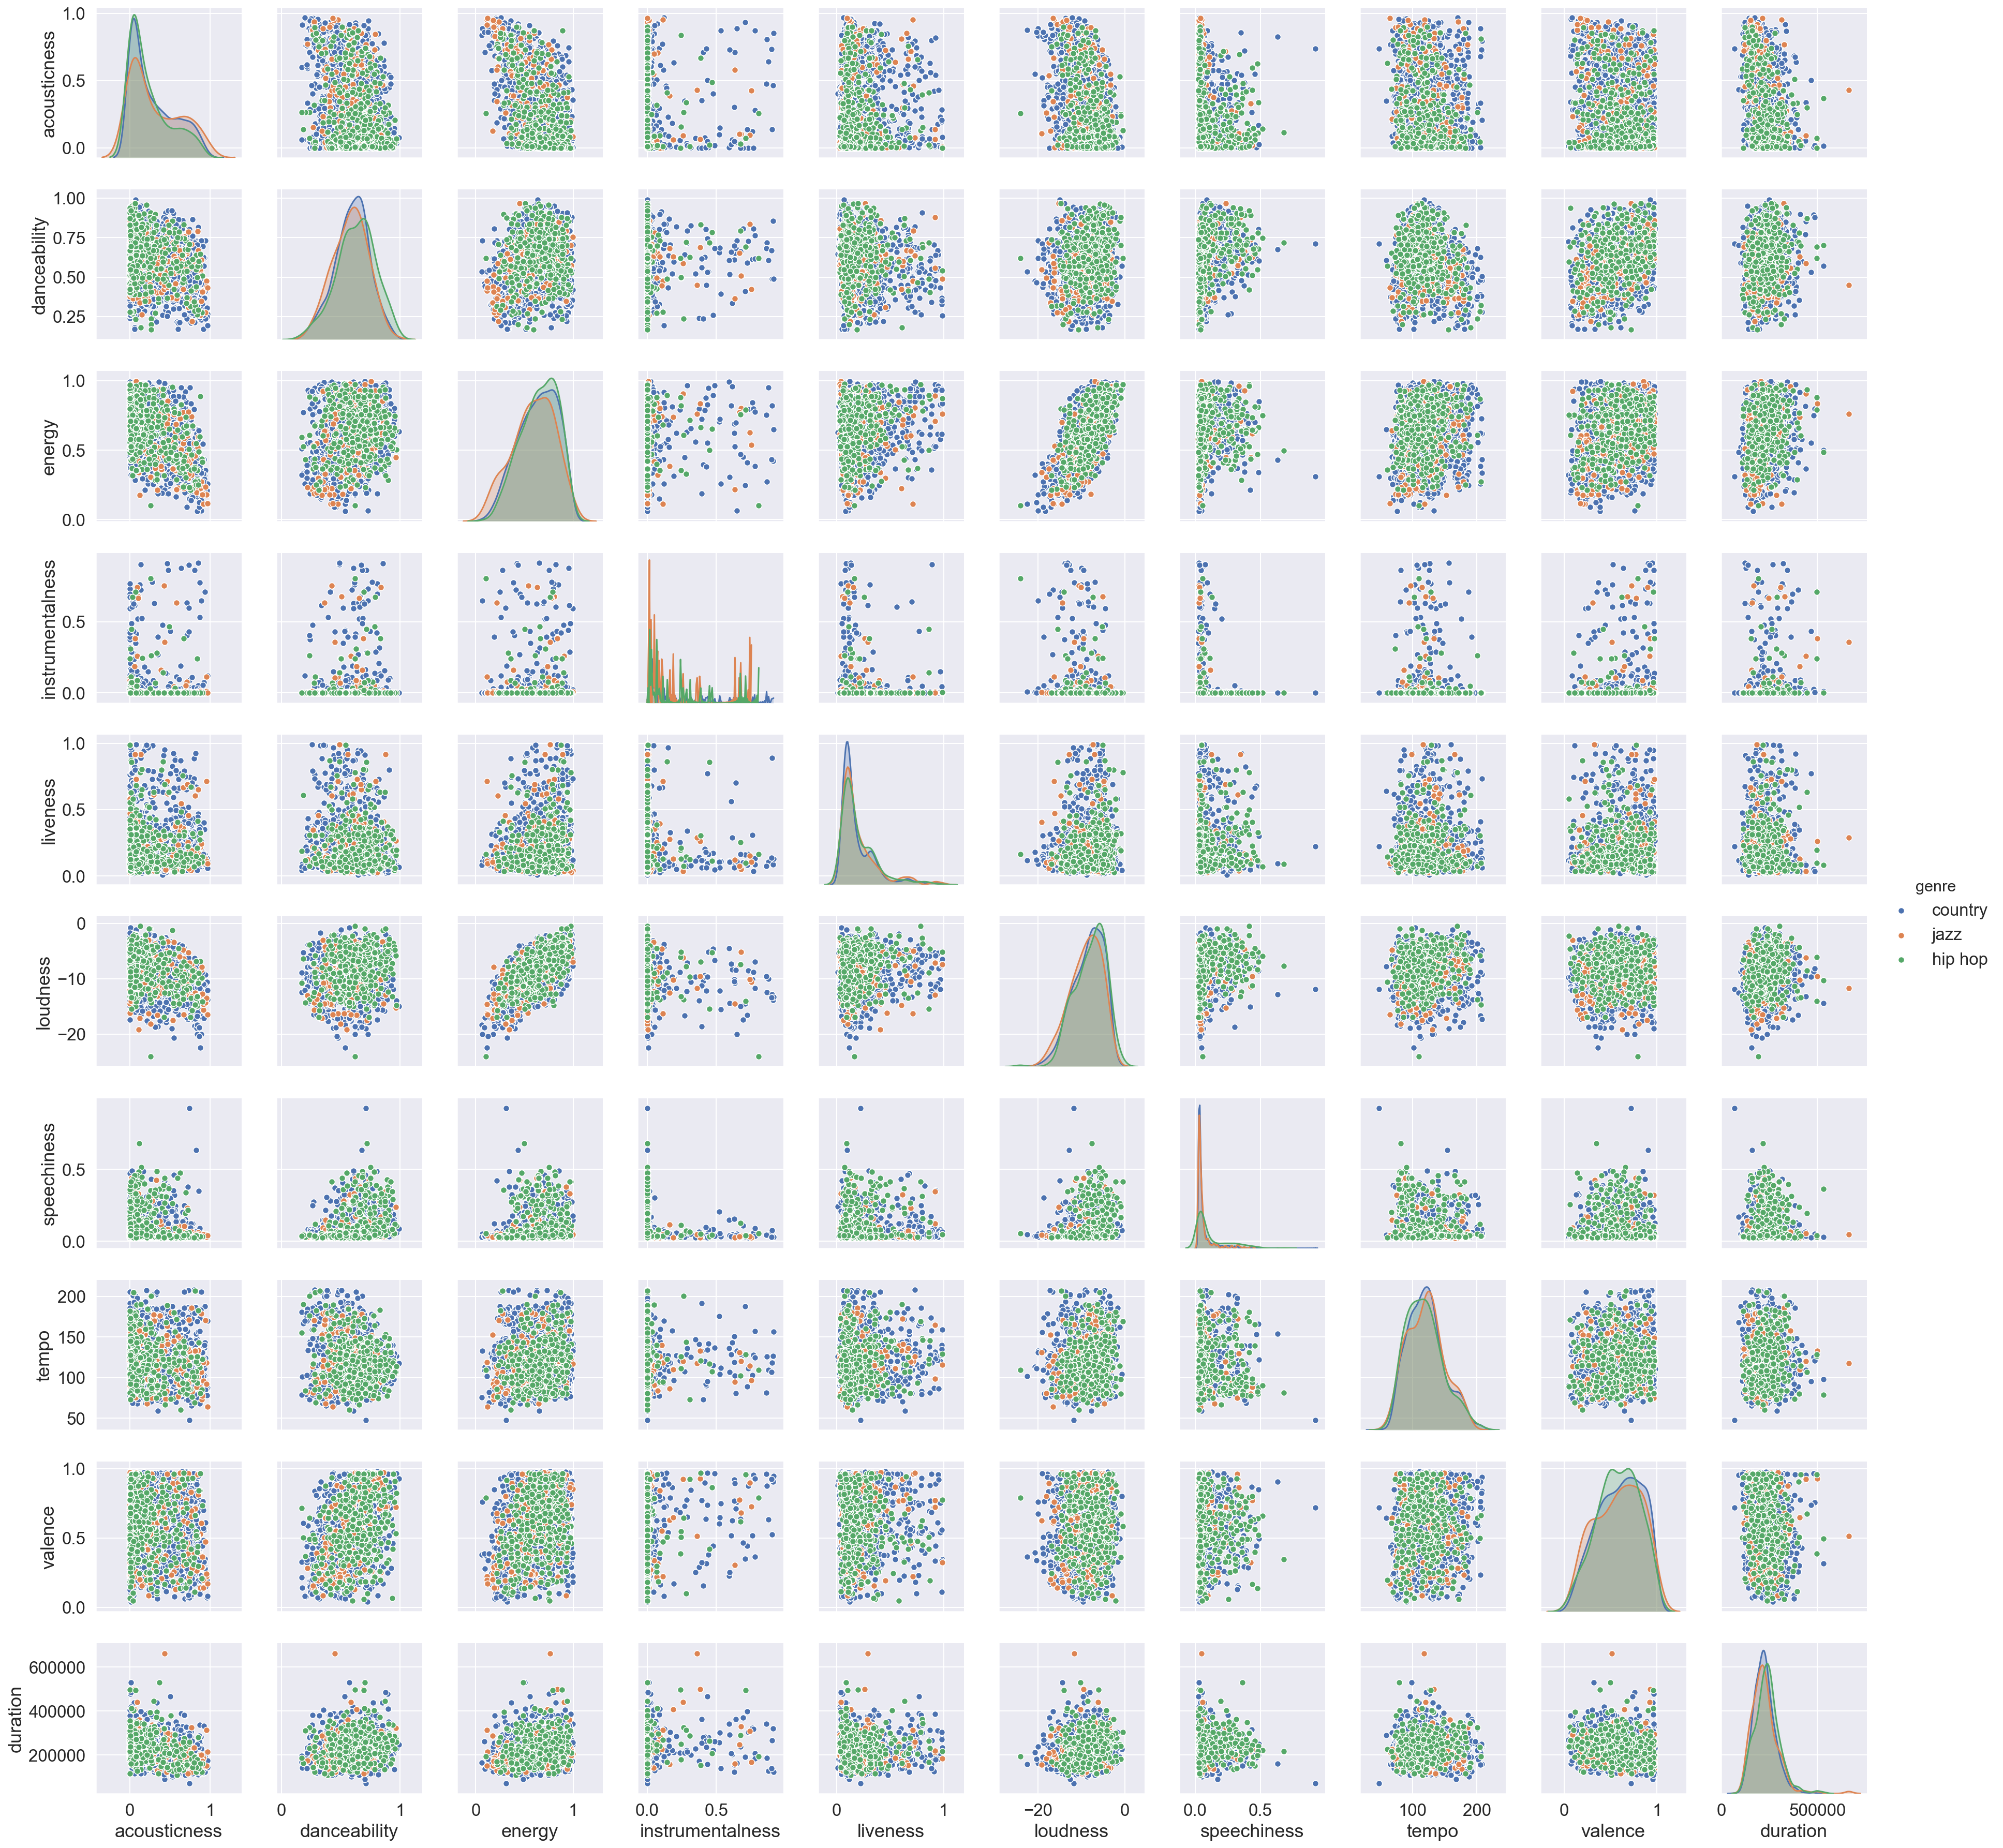

In [263]:
musical = df[['genre','acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
                    'speechiness', 'tempo', 'valence', 'duration']]
musical = musical[musical['genre'].isin(genre_list)]
sns.pairplot(musical, hue='genre');

In [264]:
less_genres = df[df['genre'].isin(genre_list)]

In [265]:
X = less_genres[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness','speechiness', 
'tempo', 'valence', 'duration', 'key', 'mode', 'time_signature','spot_followers', 'peak_rank', 'artist_familiarity', 
'track_longevity', 'time']]  
y= less_genres['genre']

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Mean cross validated training scores:')
print(np.mean(cross_val_score(logreg, X_train, y_train, cv=5)))
print('Training score:')
print(logreg.score(X_train, y_train))
print('Test score:')
print(logreg.score(X_test, y_test))

Mean cross validated training scores:
0.7855992483919281
Training score:
0.7855763039278815
Test score:
0.7807807807807807


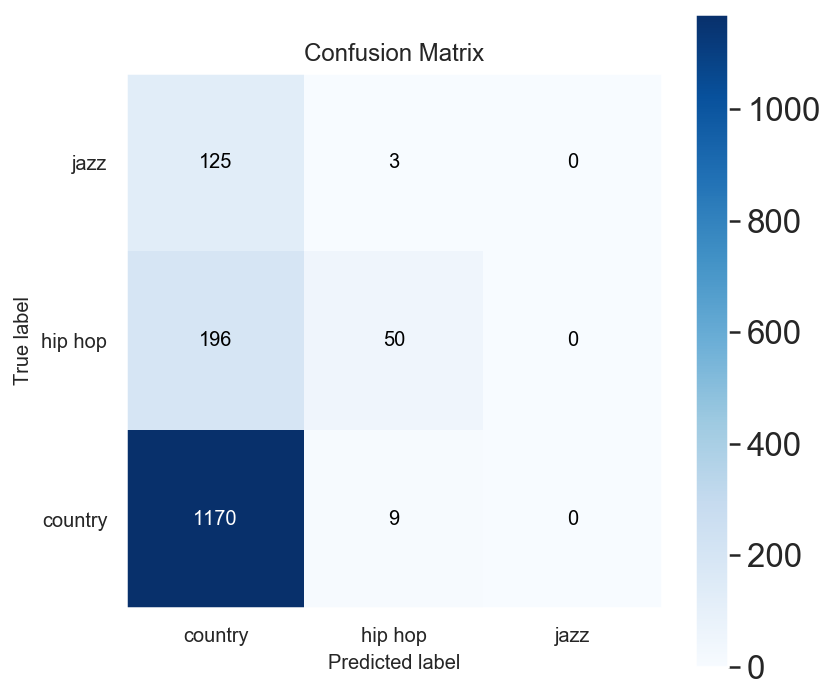

In [267]:
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", len(logreg.classes_)))
from sklearn.metrics import classification_report, confusion_matrix

predictions_train = logreg.predict(X_train)
predictions_test = logreg.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_train, predictions_train, figsize=(6,6))
plt.ylim([-0.5, len(y_train.unique())-0.5])
plt.show()

### smote

In [1]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 

Because it is an unbalance dataset
Smote: First it finds the n-nearest neighbors in the minority class for each of the samples in the class . Then it draws a line between the the neighbors an generates random points on the lines.

In [206]:
X_genre = check[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness','speechiness', 
'tempo', 'valence', 'duration', 'key', 'mode', 'time_signature','spot_followers', 'peak_rank', 'artist_familiarity', 
'track_longevity', 'time']]  
y_genre= check['genre']

In [ ]:
from imblearn.pipeline import Pipeline 
scaler = StandardScaler()
smt = SMOTE(random_state=42)
logreg = LogisticRegression()
pipeline = Pipeline([('scaler', scaler), ('smt', smt), ('logreg', logreg)])
X_train, X_test, y_train, y_test = train_test_split(X_genre, y_genre, stratify=y_genre, test_size=0.3, random_state=1)
pipeline.fit(X_train, y_train)

print('Mean cross validated training scores:')
print(np.mean(cross_val_score(logreg, X_train, y_train, cv=5)))
print('Training score:')
print(logreg.score(X_train, y_train))
print('Test score:')
print(logreg.score(X_test, y_test))

In [ ]:
def makeOverSamplesADASYN(X,y):
    sm = ADASYN()
    X, y = sm.fit_sample(X, y)
    return(X,y)

### make my own clusters

In [ ]:
https://towardsdatascience.com/profiling-my-favorite-songs-on-spotify-through-clustering-33fee591783d

### random forest  classifier

In [58]:
X = check[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
                    'speechiness', 'tempo', 'valence', 'duration', 'key', 'mode', 'time_signature',
         
          'spot_followers', 'peak_rank', 
       
          'artist_familiarity', 'track_longevity', 'time']]       # not artist/track/genre/spot_artist_pop/

y= check['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, verbose=3)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [ ]:
rfc1.fit(x_train, y_train)
print('Mean cross validated training scores:')
print(np.mean(cross_val_score(rfc1, X_train, y_train, cv=5)))
print('Training score:')
print(rfc1.score(X_train, y_train))
print('Test score:')
print(rfc1.score(X_test, y_test))